## A simple Exploratory Data Analysis for DTI data (2017)

#### Exploratory Data Analysis
Exploratory Data Analysis is a way to gain insights, understanding and summarizing data, understanding it’s characteristics, patterns and uncovering relationships or outliers before formal modeling or hypothesis testing is done. EDA can help us to start formalizing the right questions, since wrong questions will givbe wrong answers, and can take a wrong decisions.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
df = pd.read_csv("complete_dataset.csv")
df = df[df['year'] == 2017]

In [3]:
df.tail(10)

,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9732,Vincenzo A Sagun,2017,0.0000,0.3076,2.5000,-,1.8750,0.0021,0.0465,0.1331,...,0.0000,0.0000,0.0000,0.1331,0.0000,0.1122,0.5000,0.3296,0.0267,0.9852
9738,Vintar,2017,0.0000,0.0287,2.5000,-,2.5000,0.0018,0.0410,0.2241,...,0.0021,1.8750,0.0044,0.2241,0.0006,0.0742,1.5648,0.1734,0.0543,1.3737
9744,Vinzons,2017,0.0171,0.0000,2.5000,-,2.5000,0.0160,0.1555,0.1008,...,0.0000,0.0000,0.0039,0.1008,0.0004,0.1169,1.0833,0.5521,0.1393,1.0128
9750,Virac,2017,0.0399,0.1842,2.5000,-,2.5000,0.0018,0.3399,0.1876,...,0.0150,2.5000,0.0298,0.1876,0.0017,0.2314,0.5100,0.4205,0.1241,0.9736
9756,Wao,2017,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9762,Zamboanga,2017,0.2396,0.2693,2.5000,-,2.5000,2.5000,0.3459,0.6507,...,0.1597,2.5000,0.0609,0.6507,0.0080,0.3782,2.0009,0.4968,0.4027,1.2814
9768,Zamboanguita,2017,0.0659,0.1329,2.5000,-,2.5000,0.0022,0.0959,0.0885,...,0.0138,2.5000,0.0001,0.0885,0.0012,0.2522,1.5574,0.0259,0.0687,0.9859
9774,Zaragoza,2017,0.0055,0.0000,0.0000,-,0.0000,0.0020,0.1264,0.0570,...,0.0000,2.5000,0.0009,0.0570,0.0014,0.0144,1.0000,0.0862,0.3500,0.9774
9780,Zarraga,2017,0.0195,0.3143,2.5000,-,2.5000,0.0034,0.0712,0.2813,...,0.0020,0.0000,0.0001,0.2813,0.0013,0.2779,1.5855,0.2000,0.1580,1.0065
9786,Zumarraga,2017,0.0000,0.0243,2.5000,-,1.4063,0.0021,0.0930,0.3131,...,0.0000,0.0000,0.0000,0.3131,0.0008,0.0569,1.5864,0.3079,0.0044,0.9887


Note: There are variables that has 0.000 value, and - value. For this reason we cannot replace - to 0.0000. As a result, I will remove the features and towns that has -

In [4]:
df1 = df.iloc[:, 2:]

In [5]:
# finding the column with only - values
columns_with_minus = df1.eq('-').all()
columns_with_minus = columns_with_minus[columns_with_minus].index.tolist()
print(columns_with_minus)

['availability_of_basic_internet_service']


Removing the column df.availability_of_basic_internet_service

In [6]:
df1 = df1.drop(['availability_of_basic_internet_service'], axis=1)

In [7]:
# finding the row with only - values
rows_with_minus = df1.eq('-').all(1)
rows_with_minus = df1[rows_with_minus].index.tolist()
print(rows_with_minus)

[78, 90, 96, 312, 330, 432, 588, 708, 714, 822, 858, 978, 984, 1014, 1146, 1200, 1308, 1404, 1458, 1464, 1566, 1572, 1656, 1770, 1836, 2328, 2346, 2370, 2460, 2580, 2586, 2592, 2598, 2604, 2610, 2616, 2622, 2628, 2634, 2784, 2898, 3000, 3048, 3090, 3174, 3294, 3336, 3342, 3348, 3366, 3534, 3714, 3810, 3840, 3858, 3870, 3894, 4188, 4200, 4500, 4650, 4662, 4668, 4680, 4686, 4734, 4854, 4860, 4956, 4968, 5004, 5046, 5166, 5178, 5256, 5322, 5352, 5424, 5448, 5454, 5490, 5748, 5946, 6012, 6030, 6126, 6132, 6138, 6150, 6276, 6282, 6330, 6336, 6342, 6426, 6432, 6492, 6546, 6558, 6576, 6786, 6864, 6984, 7008, 7224, 7326, 7644, 7728, 7812, 7848, 7938, 7980, 8088, 8112, 8346, 8430, 8436, 8442, 8508, 8556, 8562, 8640, 8706, 8712, 8760, 8766, 8772, 8784, 8796, 8856, 8952, 9006, 9018, 9054, 9084, 9120, 9174, 9180, 9318, 9366, 9420, 9468, 9492, 9540, 9564, 9606, 9756]


Removing the rows

In [8]:
mask = ~df1.index.isin(rows_with_minus)
df1 = df1[mask]

In [9]:
df1.tail(10)

,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9726,0.0000,0.0942,2.5000,2.1875,0.0022,0.0872,0.0593,0.8436,0.0000,0.0000,...,0.0000,1.2500,0.0006,0.0593,0.0000,0.0000,1.0028,0.1041,0.0103,0.9899
9732,0.0000,0.3076,2.5000,1.8750,0.0021,0.0465,0.1331,0.0349,2.4609,2.3026,...,0.0000,0.0000,0.0000,0.1331,0.0000,0.1122,0.5000,0.3296,0.0267,0.9852
9738,0.0000,0.0287,2.5000,2.5000,0.0018,0.0410,0.2241,0.6619,2.0182,2.4359,...,0.0021,1.8750,0.0044,0.2241,0.0006,0.0742,1.5648,0.1734,0.0543,1.3737
9744,0.0171,0.0000,2.5000,2.5000,0.0160,0.1555,0.1008,0.4560,1.0349,2.4013,...,0.0000,0.0000,0.0039,0.1008,0.0004,0.1169,1.0833,0.5521,0.1393,1.0128
9750,0.0399,0.1842,2.5000,2.5000,0.0018,0.3399,0.1876,0.2336,1.7230,0.0000,...,0.0150,2.5000,0.0298,0.1876,0.0017,0.2314,0.5100,0.4205,0.1241,0.9736
9762,0.2396,0.2693,2.5000,2.5000,2.5000,0.3459,0.6507,1.5355,0.9969,1.2500,...,0.1597,2.5000,0.0609,0.6507,0.0080,0.3782,2.0009,0.4968,0.4027,1.2814
9768,0.0659,0.1329,2.5000,2.5000,0.0022,0.0959,0.0885,0.3089,2.1502,2.3355,...,0.0138,2.5000,0.0001,0.0885,0.0012,0.2522,1.5574,0.0259,0.0687,0.9859
9774,0.0055,0.0000,0.0000,0.0000,0.0020,0.1264,0.0570,0.6028,2.4018,2.3684,...,0.0000,2.5000,0.0009,0.0570,0.0014,0.0144,1.0000,0.0862,0.3500,0.9774
9780,0.0195,0.3143,2.5000,2.5000,0.0034,0.0712,0.2813,0.1226,2.2872,0.0000,...,0.0020,0.0000,0.0001,0.2813,0.0013,0.2779,1.5855,0.2000,0.1580,1.0065
9786,0.0000,0.0243,2.5000,1.4063,0.0021,0.0930,0.3131,0.7237,1.8189,2.3684,...,0.0000,0.0000,0.0000,0.3131,0.0008,0.0569,1.5864,0.3079,0.0044,0.9887


In [10]:
df1.describe()

,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
count,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485,...,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485
unique,386,846,2,94,214,751,1034,1228,940,99,...,272,5,386,1034,175,1113,667,1196,896,815
top,0.0000,0.0000,2.5000,2.5000,0.0022,0.0756,0.0000,0.0000,0.0000,0.0000,...,0.0000,2.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
freq,826,516,1301,1028,427,24,166,158,75,382,...,443,599,297,166,278,140,111,166,68,98


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 9786
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   accommodation_capacity                               1485 non-null   object
 1   active_establishments_in_the_locality                1485 non-null   object
 2   annual_disaster_drill                                1485 non-null   object
 3   availability_of_basic_utilities                      1485 non-null   object
 4   budget_for_drrmp                                     1485 non-null   object
 5   capacity_of_health_services                          1485 non-null   object
 6   capacity_of_school_services                          1485 non-null   object
 7   capacity_to_generate_local_resource                  1485 non-null   object
 8   compliance_to_arta_citizens_charter                  1485 non-null   object
 9

In [12]:
#original dataset
df.shape

(1632, 42)

In [13]:
#new dataset
df1.shape

(1485, 39)

In [14]:
df = df.iloc[:,:1]

Merging the two dataframe

In [15]:
df_merged = pd.merge(df, df1, left_index=True, right_index=True)

In [16]:
df_merged.tail()

,city_municipality,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9762,Zamboanga,0.2396,0.2693,2.5000,2.5000,2.5000,0.3459,0.6507,1.5355,0.9969,...,0.1597,2.5000,0.0609,0.6507,0.0080,0.3782,2.0009,0.4968,0.4027,1.2814
9768,Zamboanguita,0.0659,0.1329,2.5000,2.5000,0.0022,0.0959,0.0885,0.3089,2.1502,...,0.0138,2.5000,0.0001,0.0885,0.0012,0.2522,1.5574,0.0259,0.0687,0.9859
9774,Zaragoza,0.0055,0.0000,0.0000,0.0000,0.0020,0.1264,0.0570,0.6028,2.4018,...,0.0000,2.5000,0.0009,0.0570,0.0014,0.0144,1.0000,0.0862,0.3500,0.9774
9780,Zarraga,0.0195,0.3143,2.5000,2.5000,0.0034,0.0712,0.2813,0.1226,2.2872,...,0.0020,0.0000,0.0001,0.2813,0.0013,0.2779,1.5855,0.2000,0.1580,1.0065
9786,Zumarraga,0.0000,0.0243,2.5000,1.4063,0.0021,0.0930,0.3131,0.7237,1.8189,...,0.0000,0.0000,0.0000,0.3131,0.0008,0.0569,1.5864,0.3079,0.0044,0.9887


In [17]:
# sanity check
df1.tail()

,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9762,0.2396,0.2693,2.5000,2.5000,2.5000,0.3459,0.6507,1.5355,0.9969,1.2500,...,0.1597,2.5000,0.0609,0.6507,0.0080,0.3782,2.0009,0.4968,0.4027,1.2814
9768,0.0659,0.1329,2.5000,2.5000,0.0022,0.0959,0.0885,0.3089,2.1502,2.3355,...,0.0138,2.5000,0.0001,0.0885,0.0012,0.2522,1.5574,0.0259,0.0687,0.9859
9774,0.0055,0.0000,0.0000,0.0000,0.0020,0.1264,0.0570,0.6028,2.4018,2.3684,...,0.0000,2.5000,0.0009,0.0570,0.0014,0.0144,1.0000,0.0862,0.3500,0.9774
9780,0.0195,0.3143,2.5000,2.5000,0.0034,0.0712,0.2813,0.1226,2.2872,0.0000,...,0.0020,0.0000,0.0001,0.2813,0.0013,0.2779,1.5855,0.2000,0.1580,1.0065
9786,0.0000,0.0243,2.5000,1.4063,0.0021,0.0930,0.3131,0.7237,1.8189,2.3684,...,0.0000,0.0000,0.0000,0.3131,0.0008,0.0569,1.5864,0.3079,0.0044,0.9887


In [18]:
# sanity check
df.tail()

,city_municipality
9762,Zamboanga
9768,Zamboanguita
9774,Zaragoza
9780,Zarraga
9786,Zumarraga


<AxesSubplot:>

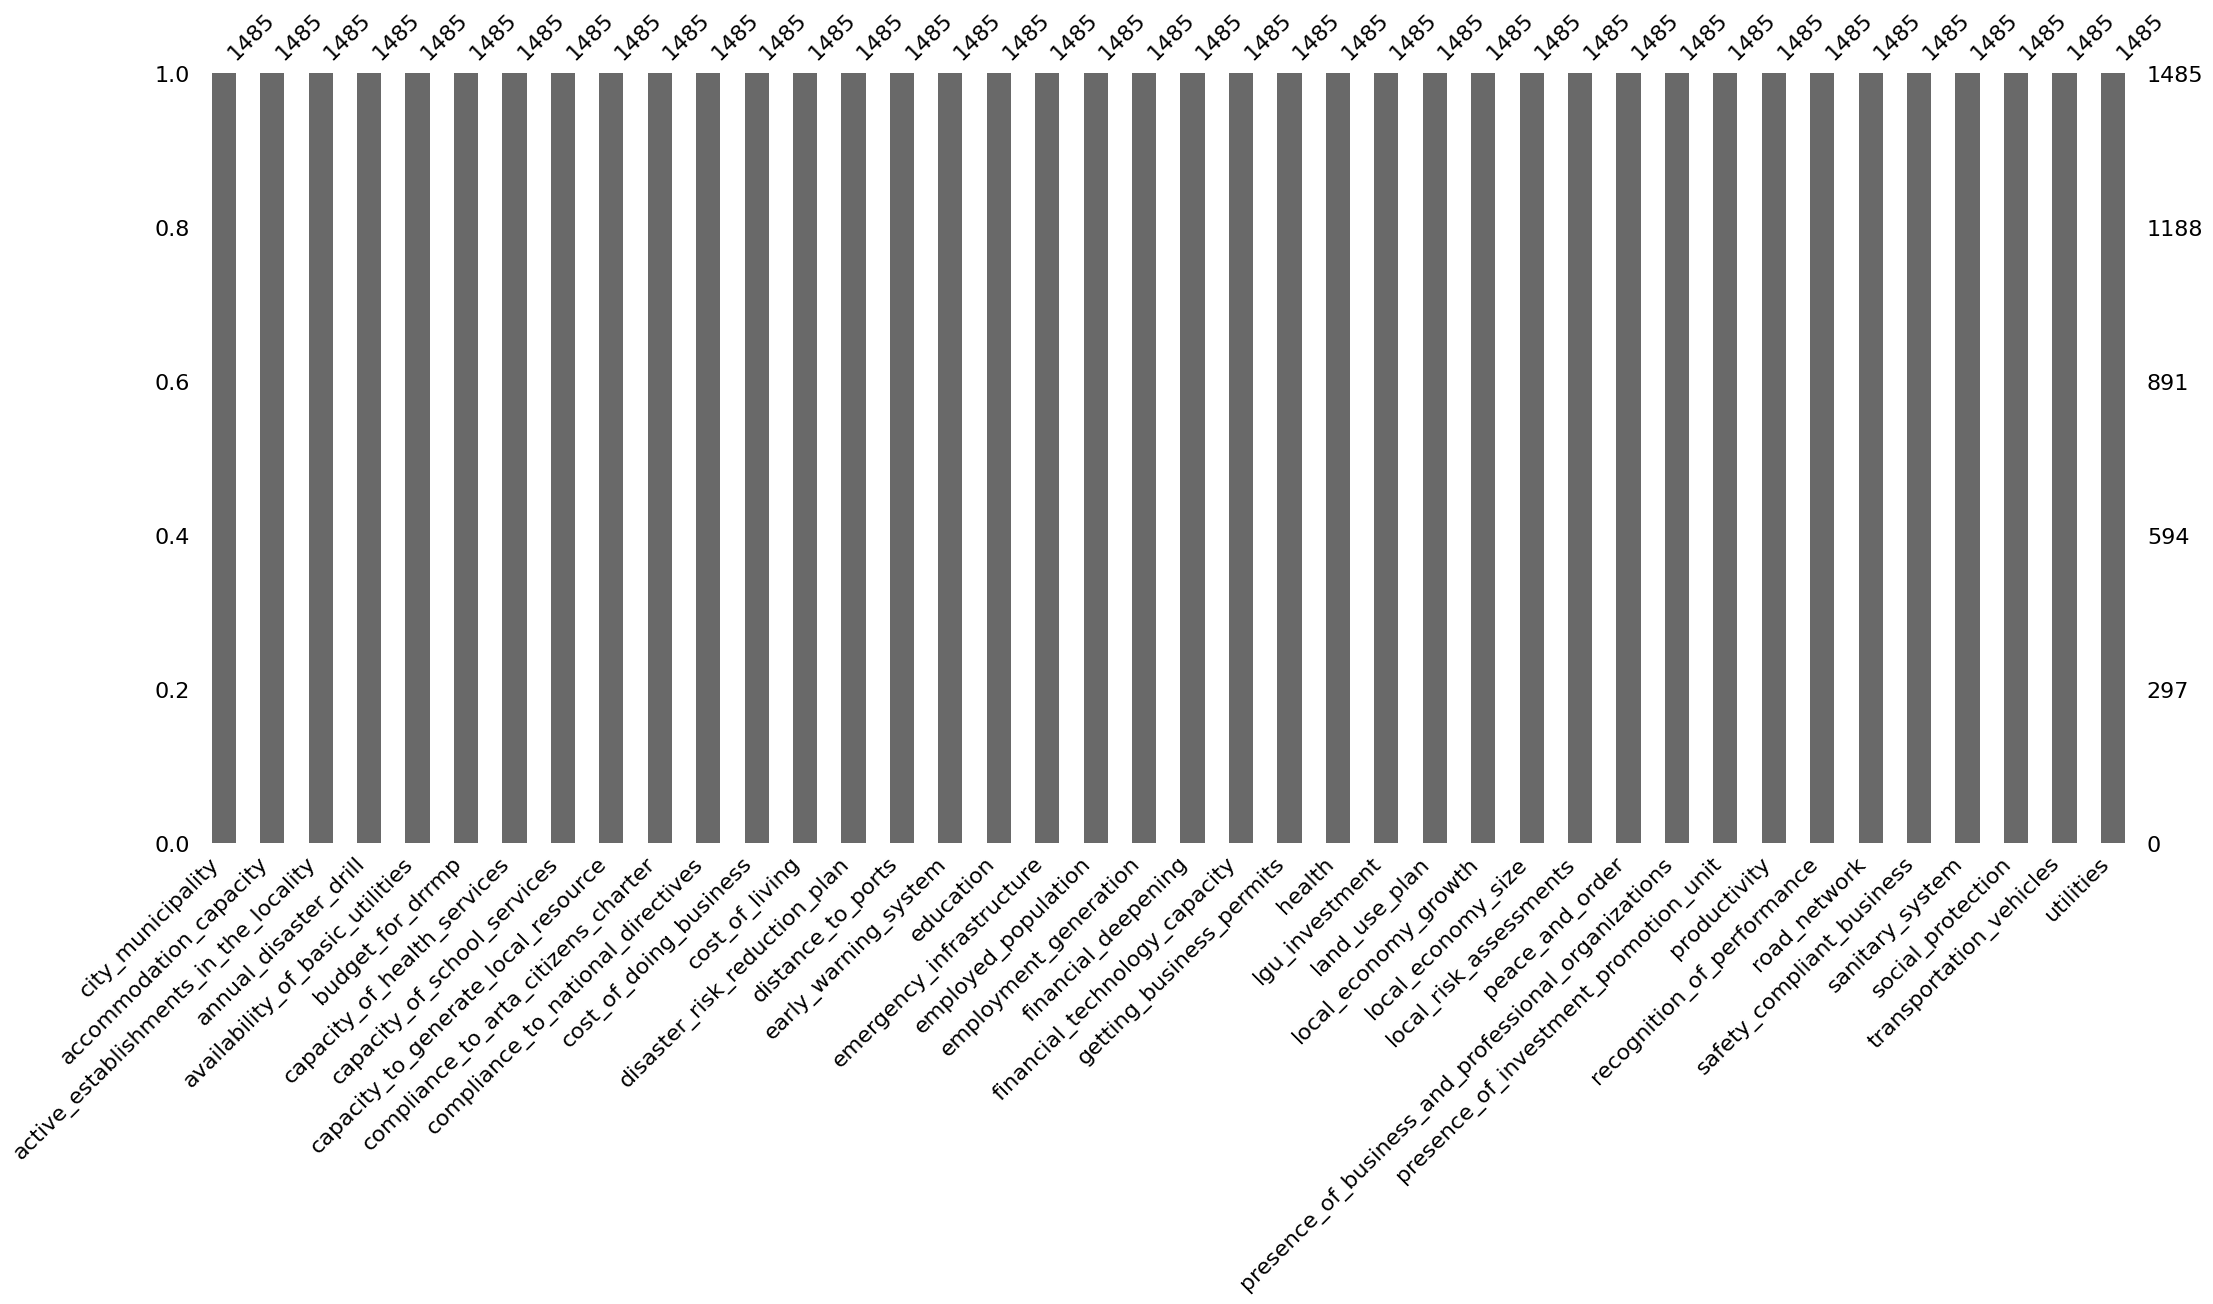

In [19]:
msno.bar(df_merged)

According to the table and figure above, it seems like the dtidata has no null values, and was already cleaned by the data collection team. We cannot further use missingno library.

In [20]:
df_merged.describe()

,city_municipality,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
count,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485,...,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485
unique,1485,386,846,2,94,214,751,1034,1228,940,...,272,5,386,1034,175,1113,667,1196,896,815
top,Aborlan,0.0000,0.0000,2.5000,2.5000,0.0022,0.0756,0.0000,0.0000,0.0000,...,0.0000,2.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
freq,1,826,516,1301,1028,427,24,166,158,75,...,443,599,297,166,278,140,111,166,68,98


In [21]:
df_merged.shape

(1485, 40)

Examine the numerical features in the data

In [22]:
numeric_features = df_merged.select_dtypes(include=[np.number])
numeric_features.columns

Index([], dtype='object')

Examine the categorical features in the data

In [23]:
cat_features = df_merged.select_dtypes(include=[np.object])
cat_features.columns

Index(['city_municipality', 'accommodation_capacity',
       'active_establishments_in_the_locality', 'annual_disaster_drill',
       'availability_of_basic_utilities', 'budget_for_drrmp',
       'capacity_of_health_services', 'capacity_of_school_services',
       'capacity_to_generate_local_resource',
       'compliance_to_arta_citizens_charter',
       'compliance_to_national_directives', 'cost_of_doing_business',
       'cost_of_living', 'disaster_risk_reduction_plan', 'distance_to_ports',
       'early_warning_system', 'education', 'emergency_infrastructure',
       'employed_population', 'employment_generation', 'financial_deepening',
       'financial_technology_capacity', 'getting_business_permits', 'health',
       'lgu_investment', 'land_use_plan', 'local_economy_growth',
       'local_economy_size', 'local_risk_assessments', 'peace_and_order',
       'presence_of_business_and_professional_organizations',
       'presence_of_investment_promotion_unit', 'productivity',
       '

All of the features are object, so I will convert it to numerical for the analysis

In [24]:
columns_to_convert = df_merged.columns[1:]
df_merged[columns_to_convert] = df_merged[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [25]:
# sanity check
cat_features = df_merged.select_dtypes(include=[np.object])
cat_features.columns

Index(['city_municipality'], dtype='object')

### Visualizing the data

In [26]:
df_merged.kurt()

C:\Users\Jomari Arubio\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


accommodation_capacity                                 107.784485
active_establishments_in_the_locality                    8.882868
annual_disaster_drill                                    3.226975
availability_of_basic_utilities                          1.884166
budget_for_drrmp                                        82.098975
capacity_of_health_services                             26.728236
capacity_of_school_services                             17.666779
capacity_to_generate_local_resource                     -0.963283
compliance_to_arta_citizens_charter                      6.354521
compliance_to_national_directives                       -1.118557
cost_of_doing_business                                   1.998915
cost_of_living                                          -0.429096
disaster_risk_reduction_plan                             7.067415
distance_to_ports                                        3.694881
early_warning_system                                     1.595422
education 

A value of 0 indicates that the data follows a normal distribution, while a positive value indicates a sharper peak (leptokurtic) and a negative value indicates a flatter peak (platykurtic) than a normal distribution.
<br>
Based on the result, it seems like only the columns capacity_to_generate_local_resource, getting_business_permits, sanitary_system, cost_of_living are pretty close in 0

<AxesSubplot:title={'center':'Log Normal'}, xlabel='cost_of_living'>

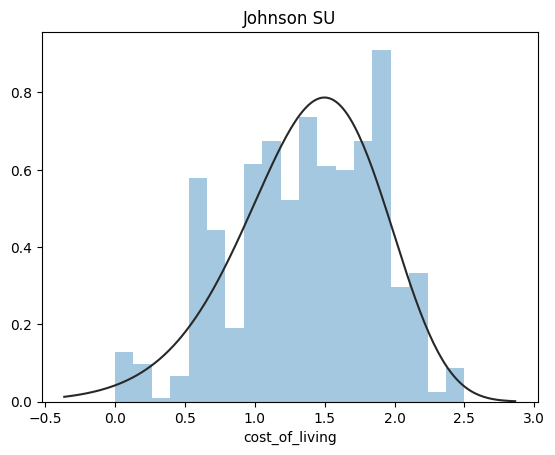

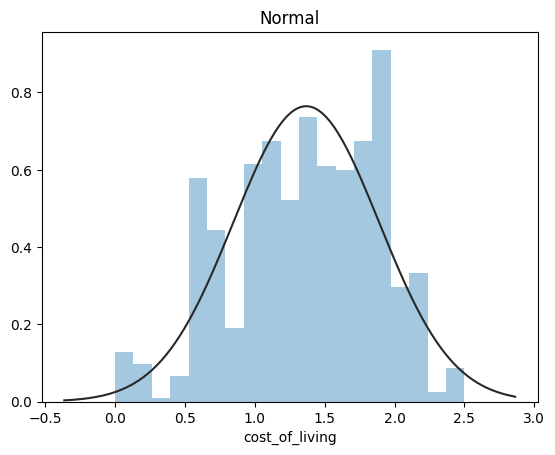

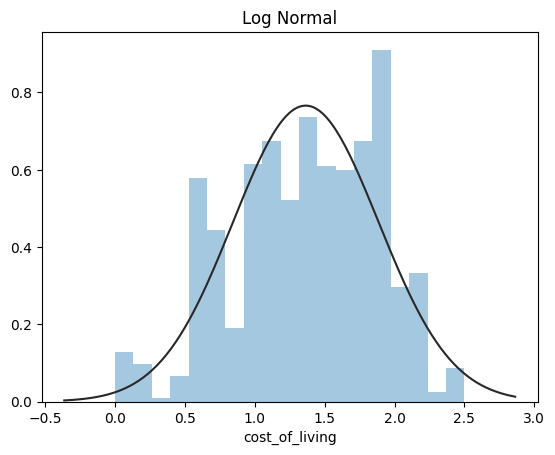

In [27]:
y = df_merged['cost_of_living']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

df_merged.cost_of_living. The figures above tell us that the emergency-infrasturcture feature does not follow normal distributuion, even after transforming it.
<br>
<br>
The results above support our claim that the data are not normally distributed

### Distribution of all the features

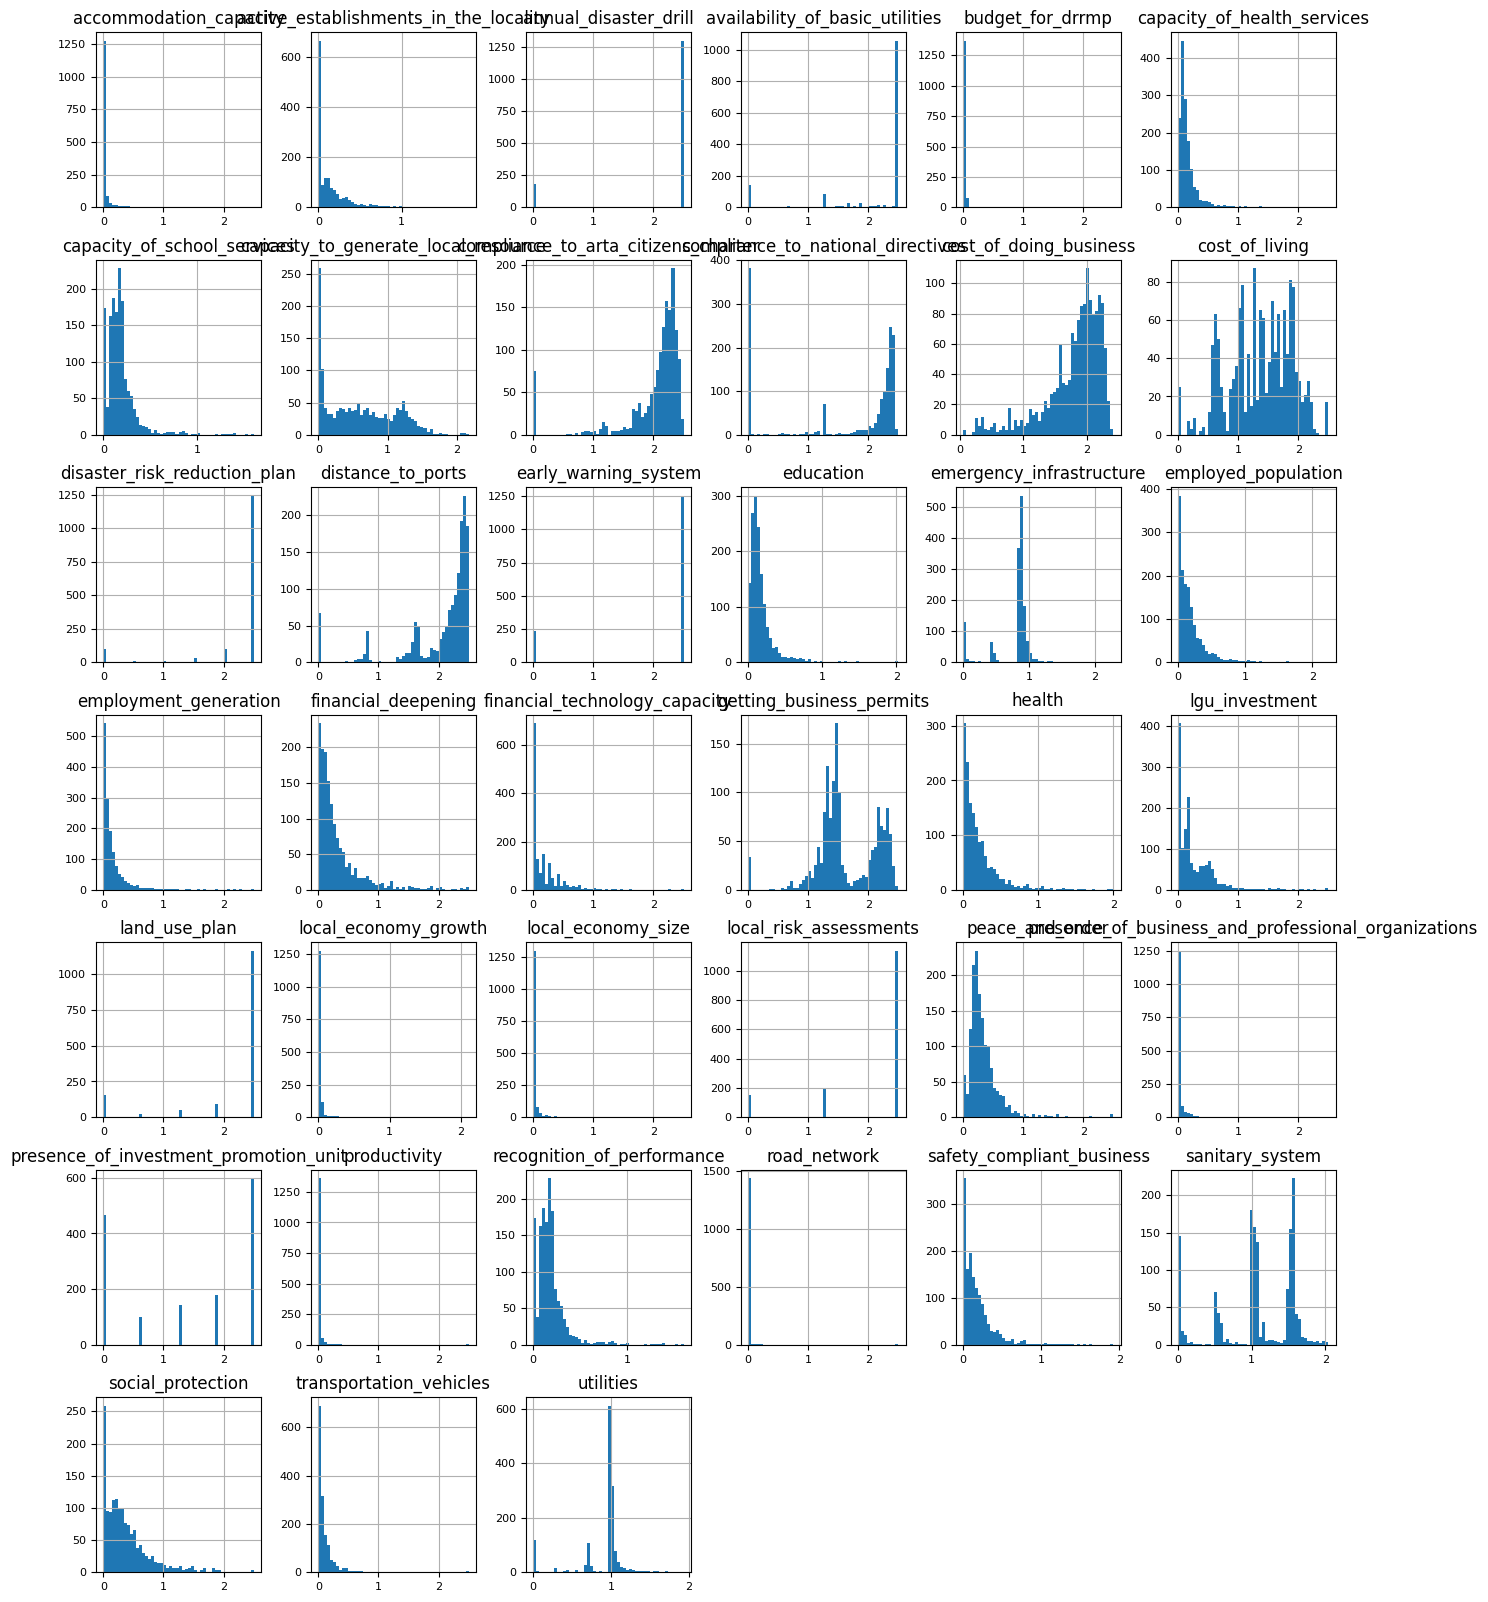

In [28]:
df_merged.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Almost 13 features are positively skewed and leptokurtic

### Exploring and Visualizing the Correlation

Finding Correlation coefficients between numeric features and local_economy_size

In [30]:
correlation = df_merged.corr()
print(correlation['disaster_risk_reduction_plan'].sort_values(ascending = False),'\n')

disaster_risk_reduction_plan                           1.000000
land_use_plan                                          0.622599
annual_disaster_drill                                  0.622220
utilities                                              0.598245
early_warning_system                                   0.589397
emergency_infrastructure                               0.576406
local_risk_assessments                                 0.570041
sanitary_system                                        0.455041
availability_of_basic_utilities                        0.433006
cost_of_doing_business                                 0.378898
compliance_to_national_directives                      0.351171
getting_business_permits                               0.339076
presence_of_investment_promotion_unit                  0.307274
compliance_to_arta_citizens_charter                    0.298213
recognition_of_performance                             0.211380
capacity_of_school_services             

In [35]:
correlation = df_merged.corr()
print(correlation['capacity_of_health_services'].sort_values(ascending = False),'\n')

capacity_of_health_services                            1.000000
health                                                 0.663947
financial_technology_capacity                          0.502364
employed_population                                    0.484292
safety_compliant_business                              0.465070
financial_deepening                                    0.464599
education                                              0.436795
active_establishments_in_the_locality                  0.436107
transportation_vehicles                                0.410220
social_protection                                      0.353511
employment_generation                                  0.337674
accommodation_capacity                                 0.243358
local_economy_size                                     0.237995
getting_business_permits                               0.210618
recognition_of_performance                             0.207615
capacity_of_school_services             

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

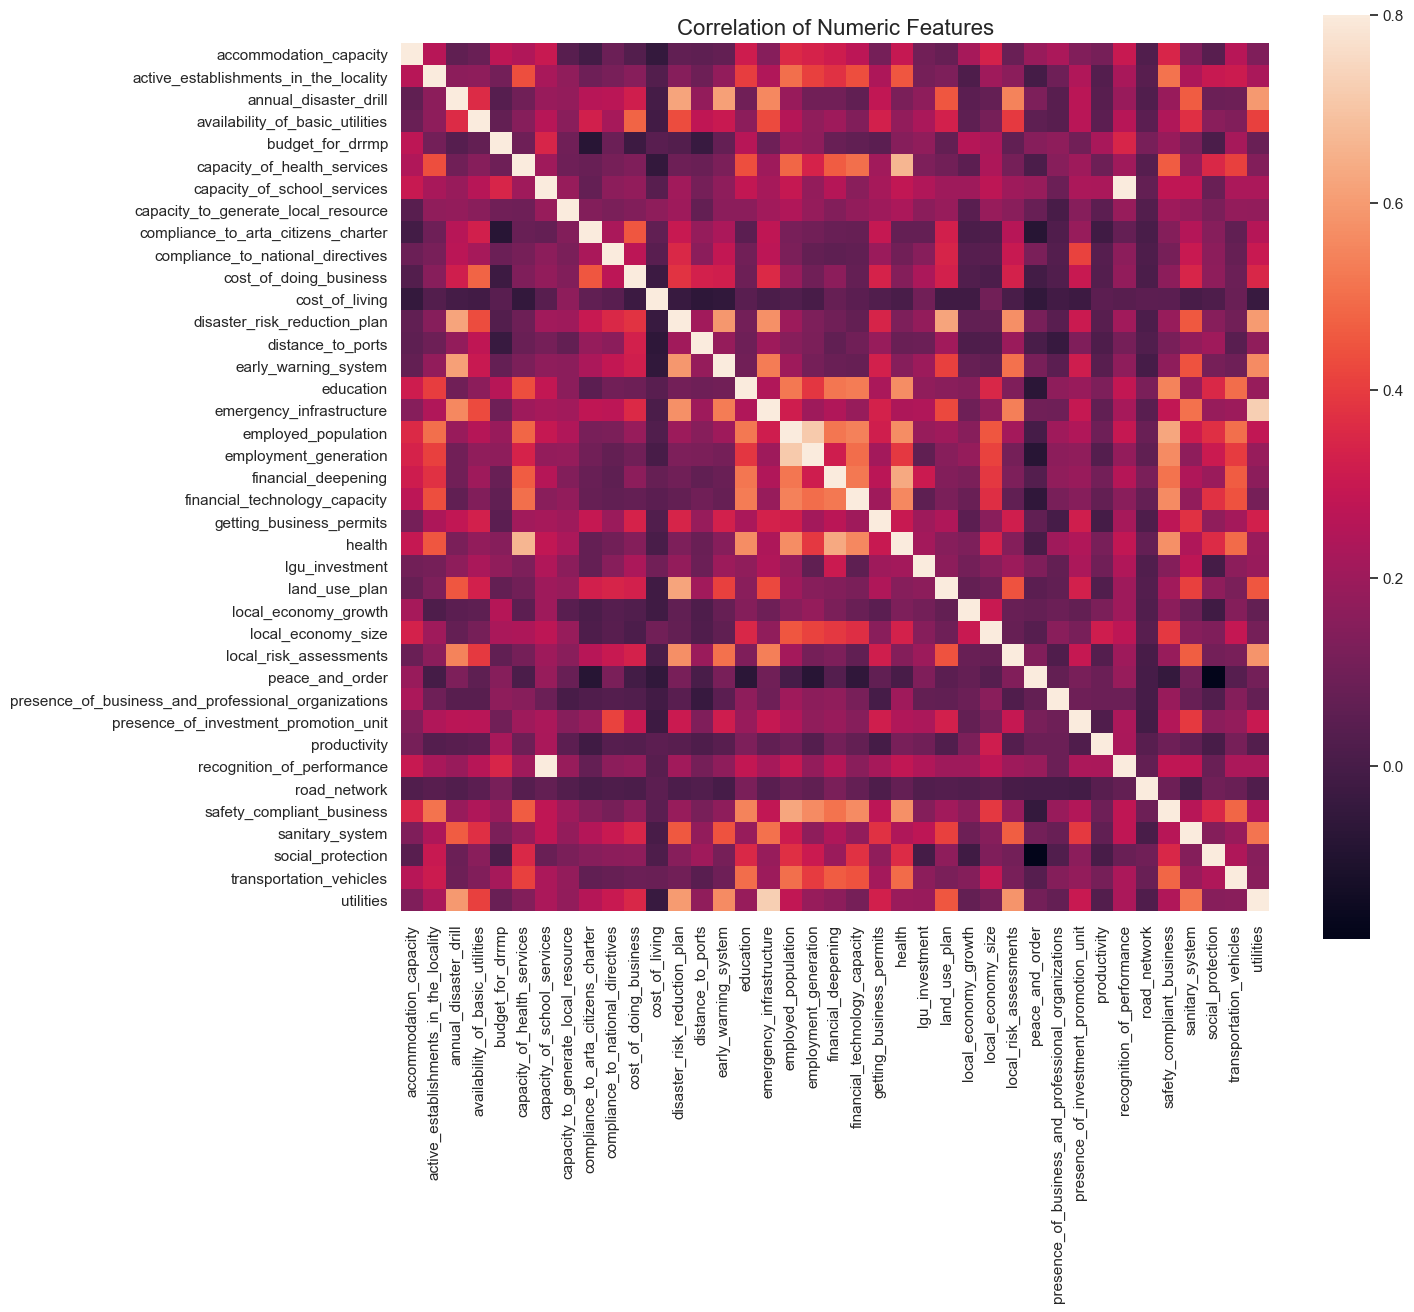

In [34]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Interpretation:



Heatmaps are effective in visualizing data because they can convey a lot of information in a compact format. By using colors to indicate the value of a variable, a heatmap can display multiple dimensions of data.

From all of the features I think only the feature capacity_of_school_services and recognition of performance shows a strong correlation, it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

Heatmaps are great to detect this kind of multicollinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.

<b>It would be good to have a correlation matrix with other data not just from dti.<b>

#### For Zoomed Correlation
The base I used is disaster_risk_reduction_plan, this to visualize the features that could be affecting in mitigating climate change 

In [31]:
k= 11
cols = correlation.nlargest(k,'disaster_risk_reduction_plan')['disaster_risk_reduction_plan'].index
print(cols)

Index(['disaster_risk_reduction_plan', 'land_use_plan',
       'annual_disaster_drill', 'utilities', 'early_warning_system',
       'emergency_infrastructure', 'local_risk_assessments', 'sanitary_system',
       'availability_of_basic_utilities', 'cost_of_doing_business',
       'compliance_to_national_directives'],
      dtype='object')


<AxesSubplot:>

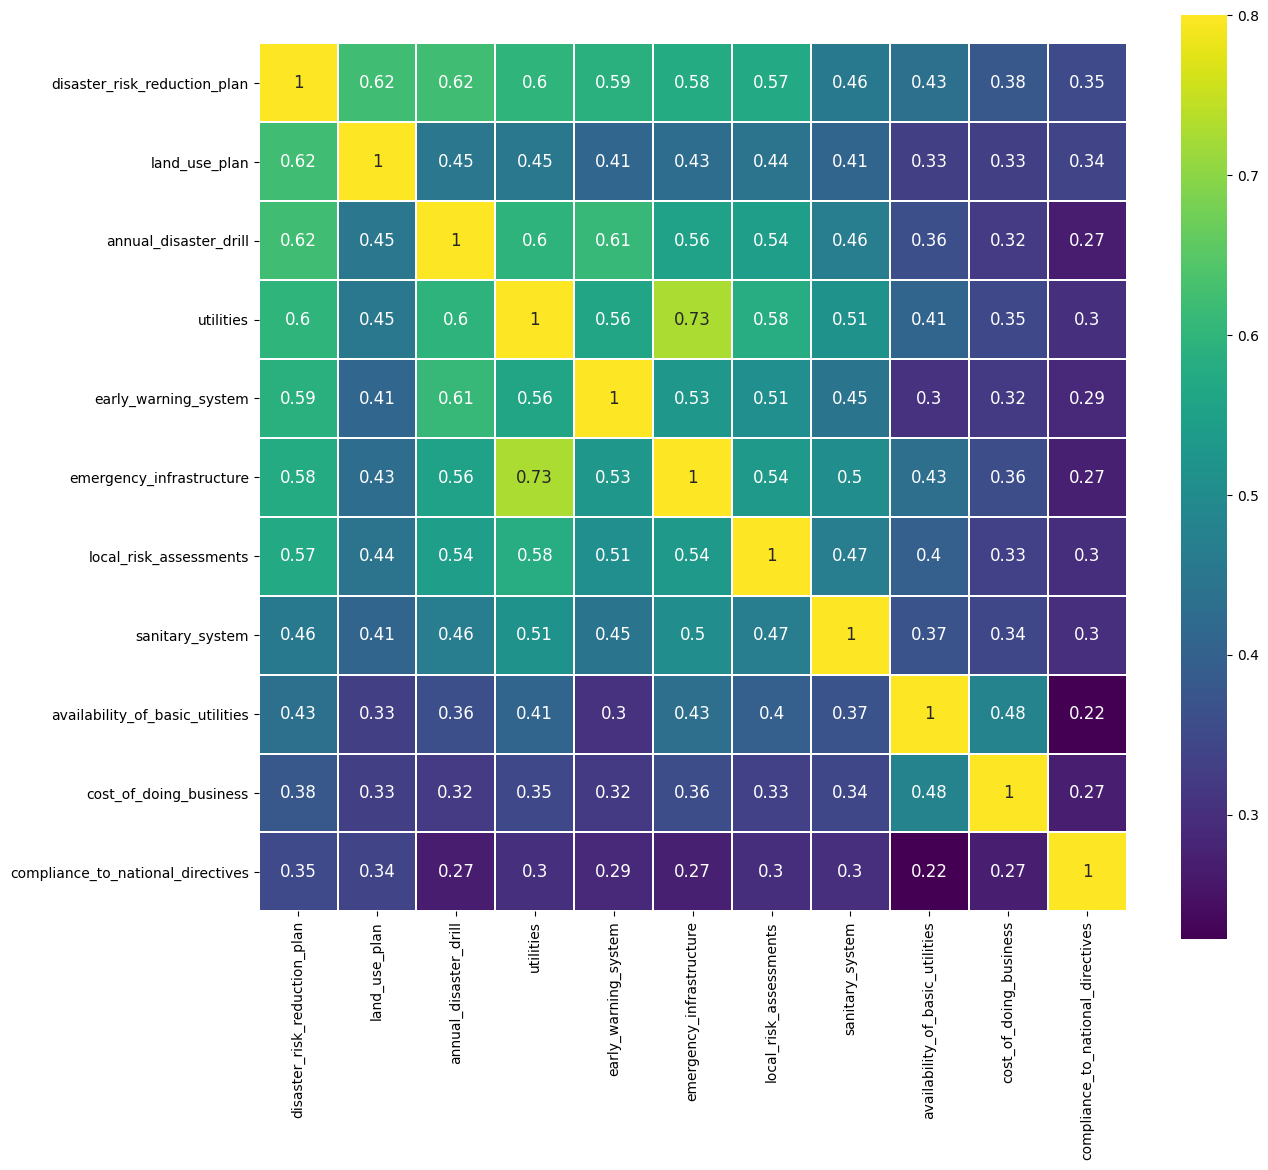

In [32]:
cm = np.corrcoef(df_merged[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [37]:
k= 11
cols = correlation.nlargest(k,'capacity_of_health_services')['capacity_of_health_services'].index
print(cols)

Index(['capacity_of_health_services', 'health',
       'financial_technology_capacity', 'employed_population',
       'safety_compliant_business', 'financial_deepening', 'education',
       'active_establishments_in_the_locality', 'transportation_vehicles',
       'social_protection', 'employment_generation'],
      dtype='object')


<AxesSubplot:>

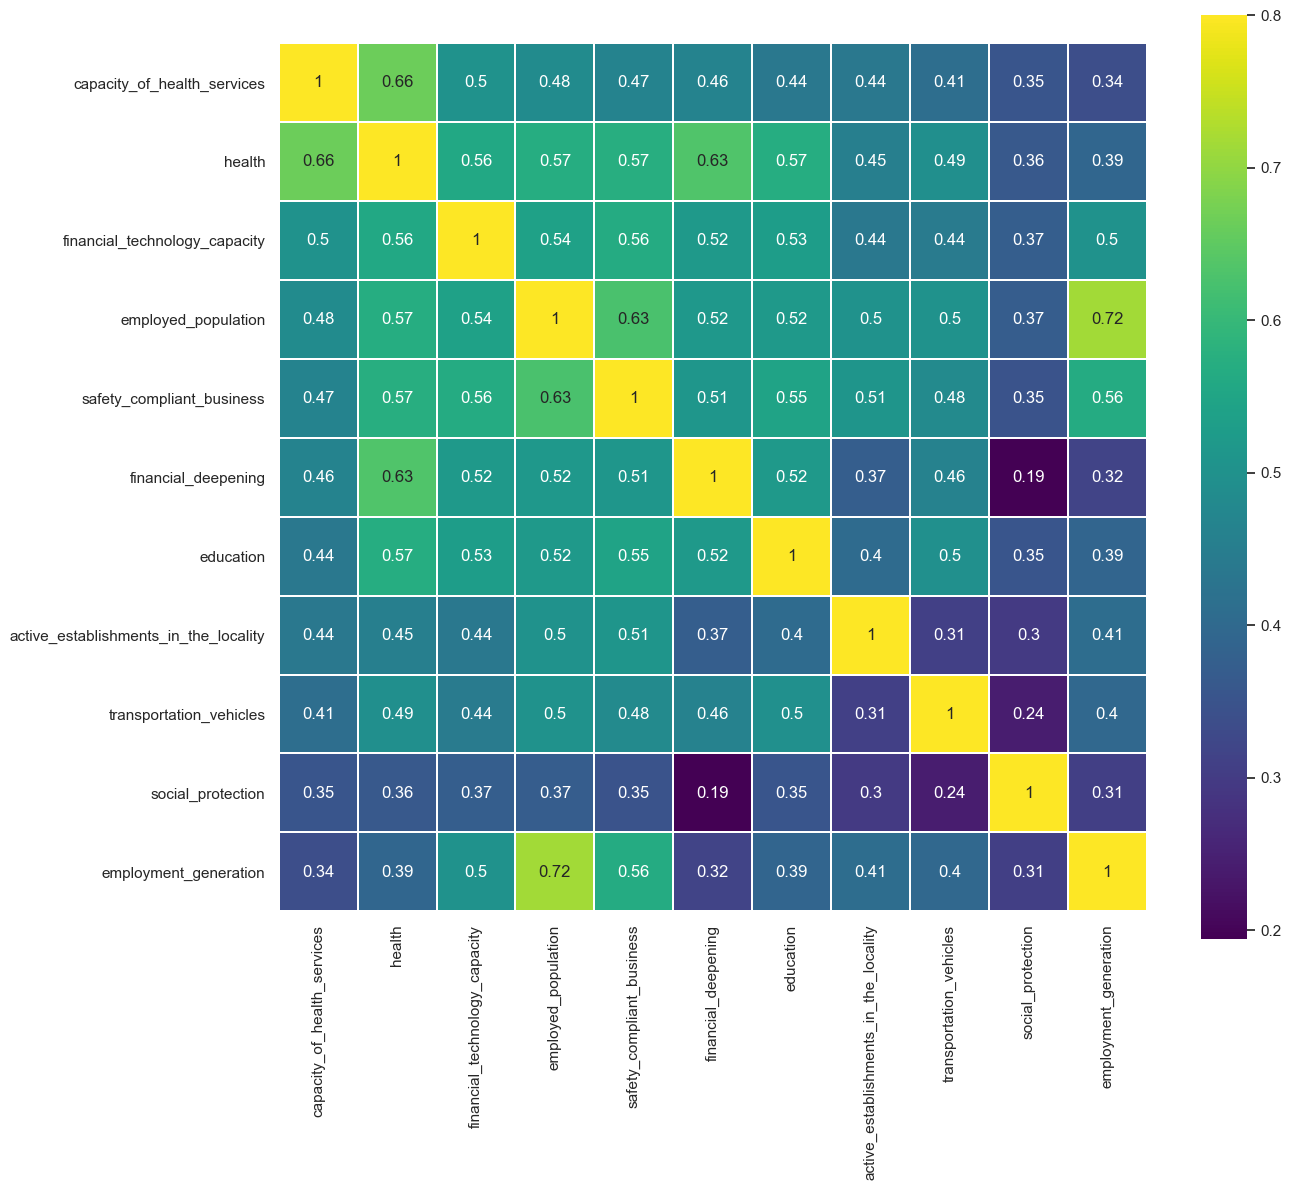

In [38]:
cm = np.corrcoef(df_merged[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [39]:
k= 11
cols = correlation.nlargest(k,'cost_of_living')['cost_of_living'].index
print(cols)

Index(['cost_of_living', 'capacity_to_generate_local_resource',
       'local_economy_size', 'lgu_investment', 'transportation_vehicles',
       'financial_deepening', 'compliance_to_arta_citizens_charter',
       'road_network', 'productivity', 'financial_technology_capacity',
       'safety_compliant_business'],
      dtype='object')


<AxesSubplot:>

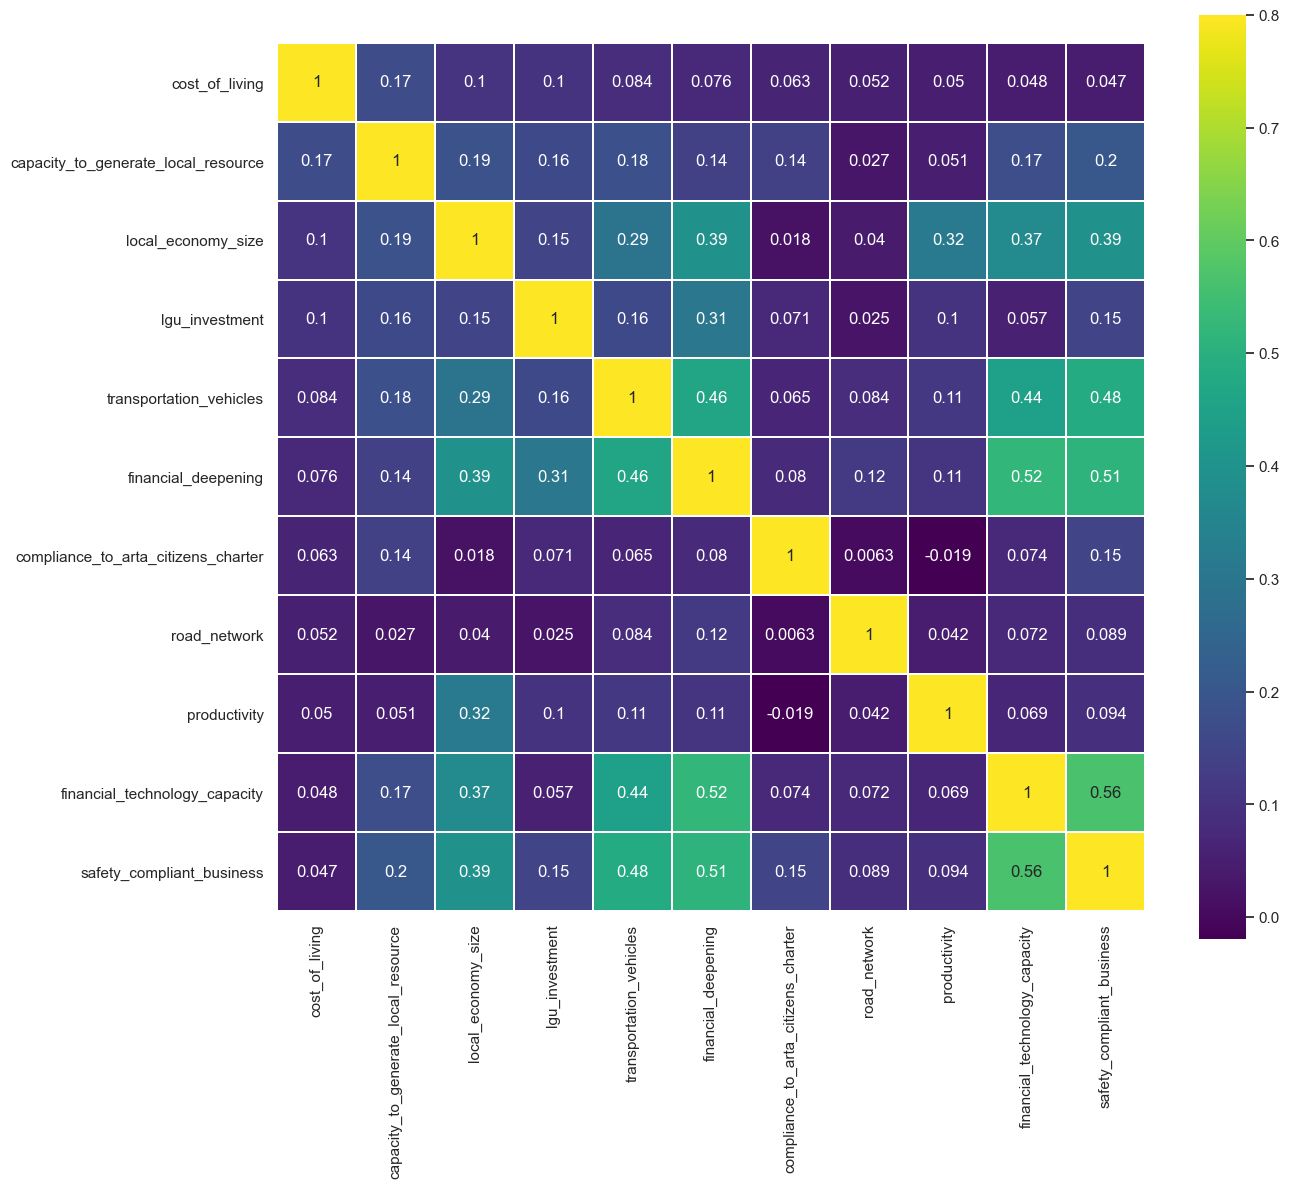

In [40]:
cm = np.corrcoef(df_merged[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Interpretation:


From above zoomed heatmap it is observed that emergency_infrastructure and utilities are closely correlated (0.73). One reason for the correlation is that they are at the same Resilliency pillar.

In depth analysis is needed to arrive at a proper conclusion. It appears like almost all of the feautures has only slight to no correlation at all.

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


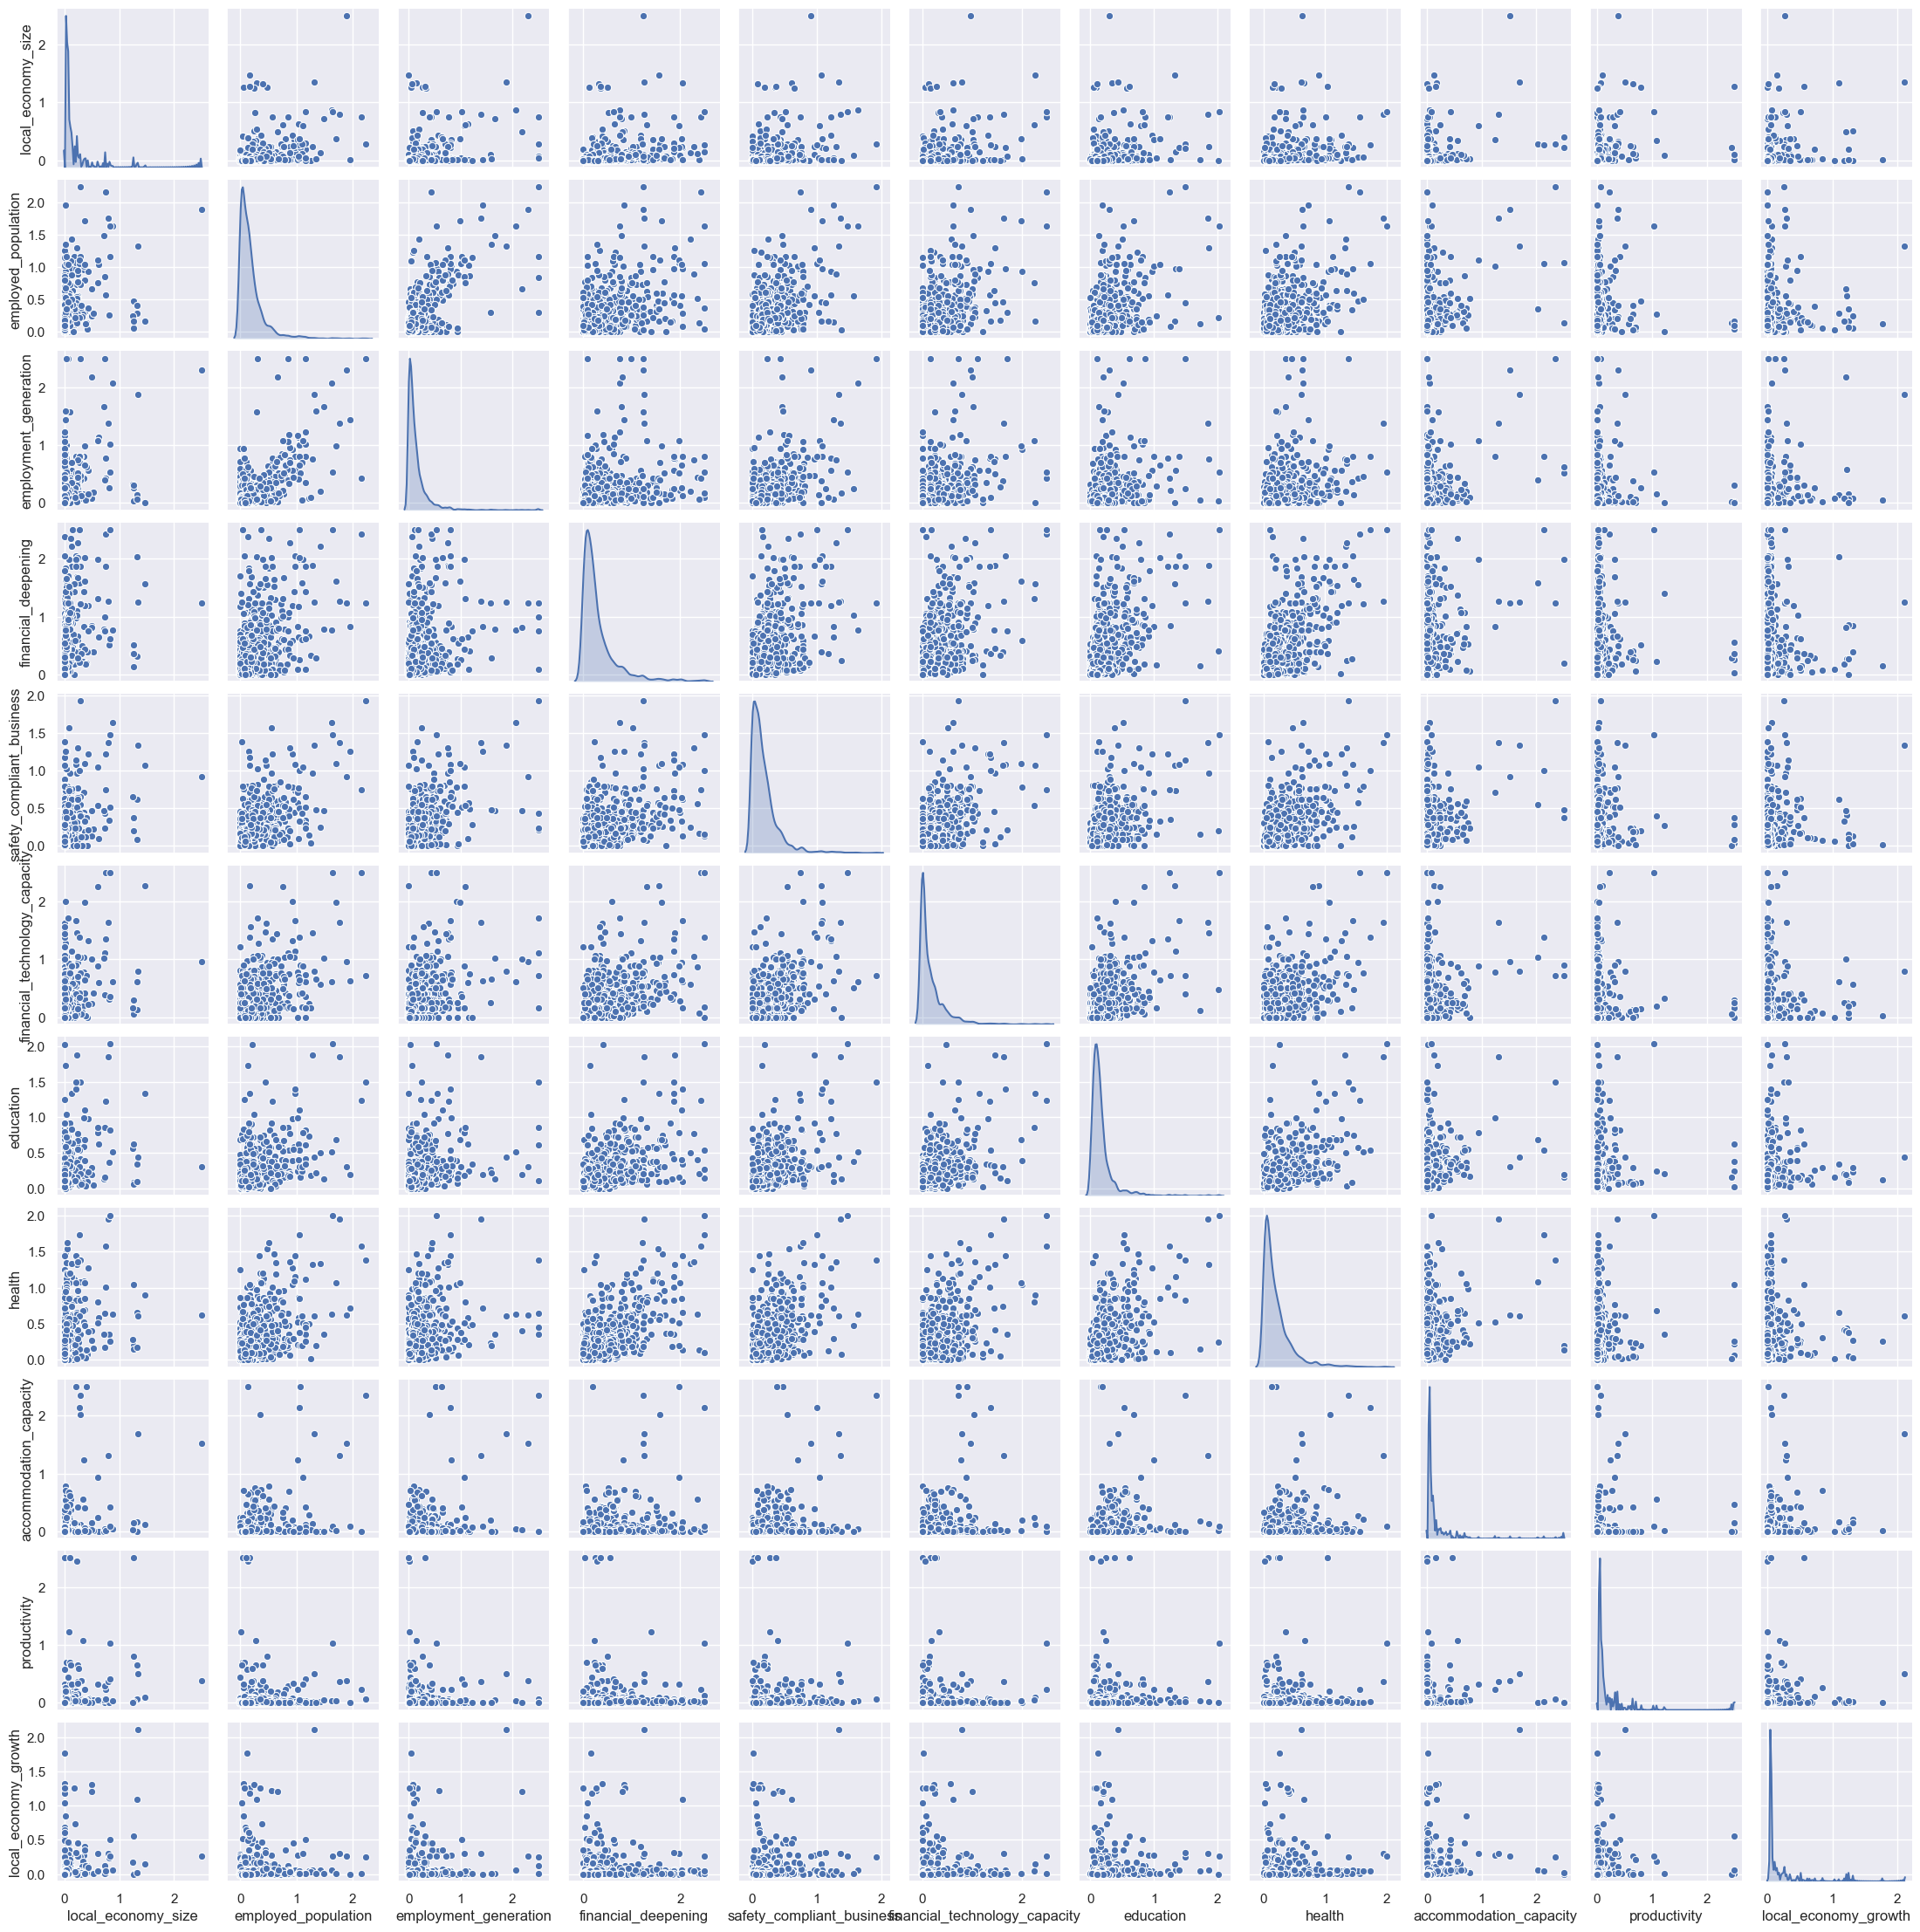

In [33]:
sns.set()
columns = ['local_economy_size', 'employed_population', 'employment_generation',
       'financial_deepening', 'safety_compliant_business',
       'financial_technology_capacity', 'education', 'health',
       'accommodation_capacity', 'productivity', 'local_economy_growth']
sns.pairplot(df_merged[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Interpretation:
    
    
This pair plot is used to visualize the relationship between multiple variables in a dataset which gives us a reasonable overview insight about the correlated features of local_economy_size.